In [1]:
import pickle
import numpy as np
import os

def load_cifar10_batch(batch_file):
    """Load a single batch of CIFAR-10."""
    with open(batch_file, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        data = data.reshape((len(data), 3, 32, 32))
        data = data.transpose(0, 2, 3, 1)  # Chuyển từ (N, 3, 32, 32) sang (N, 32, 32, 3)
    return data, labels

def load_cifar10(data_dir):
    """Load all of CIFAR-10."""
    train_data = []
    train_labels = []
    for i in range(1, 6):
        batch_file = os.path.join(data_dir, 'data_batch_{}'.format(i))
        data, labels = load_cifar10_batch(batch_file)
        train_data.append(data)
        train_labels.append(labels)

    train_data = np.concatenate(train_data)
    train_labels = np.concatenate(train_labels)

    test_data, test_labels = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))

    return train_data, train_labels, test_data, test_labels

# Đường dẫn tới thư mục chứa các tệp CIFAR-10 đã giải nén
data_dir = 'cifar-10-python\cifar-10-batches-py'

# Đọc dữ liệu
train_data, train_labels, test_data, test_labels = load_cifar10(data_dir)

test_labels = np.array(test_labels)

print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)


Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


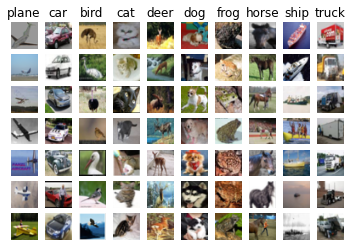

In [2]:
import matplotlib.pyplot as plt

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_data[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [3]:
num_training = 47000
num_validation = 2000
num_dev = 1000


mask = range(num_training, num_training + num_validation)
Val_data = train_data[mask]
Val_labels = train_labels[mask]

mask = range(num_training)
Train_data = train_data[mask]
Train_labels = train_labels[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
Dev_data = train_data[mask]
Dev_labels = train_labels[mask]

In [4]:
print('Train data shape: ', Train_data.shape)
print('Train labels shape: ', Train_labels.shape)
print('Validation data shape: ', Val_data.shape)
print('Validation labels shape: ', Val_labels.shape)
print('Test data shape: ', test_data.shape)
print('Test labels shape: ', test_labels.shape)

Train data shape:  (47000, 32, 32, 3)
Train labels shape:  (47000,)
Validation data shape:  (2000, 32, 32, 3)
Validation labels shape:  (2000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(Train_data, (Train_data.shape[0], -1))
X_val = np.reshape(Val_data, (Val_data.shape[0], -1))
X_test = np.reshape(test_data, (test_data.shape[0], -1))
X_dev = np.reshape(Dev_data, (Dev_data.shape[0], -1))

print('Train data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Train data shape:  (47000, 3072)
Validation data shape:  (2000, 3072)
Test data shape:  (10000, 3072)


Text(0, 0.5, 'cumulative explained variance')

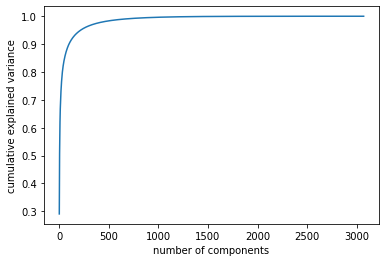

In [6]:
combined=np.vstack((X_train,X_val))
from sklearn.decomposition import PCA
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [7]:
print(pca.explained_variance_ratio_.cumsum()[149])
print(pca.explained_variance_ratio_.cumsum()[499])

0.9289115358838309
0.9835037108100868


In [8]:
pca = PCA(n_components=150) 
pca.fit(combined)
projected = pca.transform(combined)
print(pca.explained_variance_.shape)
print(pca.components_.shape)
print(combined.shape)
print(projected.shape)

(150,)
(150, 3072)
(49000, 3072)
(49000, 150)


In [16]:
x_train= projected[:47000]
y_train= Train_labels



In [20]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [21]:
pred = svc.predict(x_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))
print(pred)

Train Accuracy = 0.658128
[6 9 9 ... 5 4 9]


In [ ]:
import joblib

# Giả sử svc là mô hình đã được huấn luyện
joblib.dump(svc, 'svc_pca150.pkl')

In [31]:
import joblib
x_test = pca.transform(X_test)
y_test = test_labels

svc_pca150 = joblib.load('svc_pca150.pkl')

pred = svc_pca150.predict(x_test)
pred = np.array(pred)
y_test = np.array(y_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))
# print(pred)

Test Accuracy = 0.463100


PCA = 500

In [32]:
pca500 = PCA(n_components=500) 
pca500.fit(combined)
projected = pca500.transform(combined)
print(pca500.explained_variance_.shape)
print(pca500.components_.shape)
print(combined.shape)
print(projected.shape)

(500,)
(500, 3072)
(49000, 3072)
(49000, 500)


In [25]:
x_train2 = projected[:47000]
y_train2 = Train_labels


In [26]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=10)
svc.fit(x_train, y_train)

SVC(C=10, kernel='poly')

In [ ]:
import joblib

# Giả sử svc là mô hình đã được huấn luyện
joblib.dump(svc, 'svc_pca500.pkl')

In [34]:
svc_pca500 = joblib.load('svc_pca500.pkl')

x_test2 = pca500.transform(X_test)
y_test2 = test_labels

pred = svc_pca500.predict(x_test)
pred = np.array(pred)
y_test = np.array(y_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))

Test Accuracy = 0.478800


HOG + SVM

In [3]:
train_data, train_labels, test_data, test_labels = load_cifar10(data_dir)

test_labels = np.array(test_labels)

print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [4]:
num_training = 47000
num_validation = 3000



mask = range(num_training, num_training + num_validation)
Val_data = train_data[mask]
Val_labels = train_labels[mask]

mask = range(num_training)
Train_data = train_data[mask]
Train_labels = train_labels[mask]



In [5]:
print('Train data shape: ', Train_data.shape)
print('Train labels shape: ', Train_labels.shape)
print('Validation data shape: ', Val_data.shape)
print('Validation labels shape: ', Val_labels.shape)
print('Test data shape: ', test_data.shape)
print('Test labels shape: ', test_labels.shape)

Train data shape:  (47000, 32, 32, 3)
Train labels shape:  (47000,)
Validation data shape:  (3000, 32, 32, 3)
Validation labels shape:  (3000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [6]:
import cv2

def compute_hog_features(images):
    hog_features_list = []
    hog_descriptor = cv2.HOGDescriptor(
        _winSize=(32 // 8 * 8, 32 // 8 * 8),
        _blockSize=(16, 16),
        _blockStride=(8, 8),
        _cellSize=(8, 8),
        _nbins=9
    )

    for image in images:
        # Chuyển đổi ảnh RGB sang grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        # Tính toán HOG đặc trưng
        hog_features = hog_descriptor.compute(gray_image)
        hog_features_list.append(hog_features.flatten())
    
    hog_features_array = np.array(hog_features_list)
    return hog_features_array

In [7]:
Train_data = compute_hog_features(Train_data)
Val_data = compute_hog_features(Val_data)
test_data = compute_hog_features(test_data)

In [8]:
print('Train data shape: ', Train_data.shape)
print('Validation data shape: ', Val_data.shape)
print('Test data shape: ', test_data.shape)

Train data shape:  (47000, 324)
Validation data shape:  (3000, 324)
Test data shape:  (10000, 324)


In [9]:
X_train = Train_data
y_train = Train_labels
X_val = Val_data
y_val = Val_labels
X_test = test_data
y_test = test_labels

Text(0, 0.5, 'cumulative explained variance')

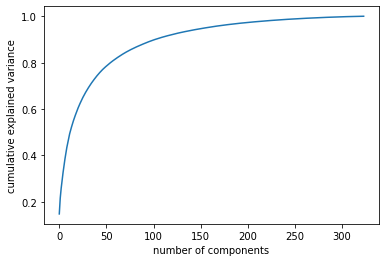

In [14]:
combined=np.vstack((X_train,X_val))
from sklearn.decomposition import PCA
pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [17]:
print(pca.explained_variance_ratio_.cumsum()[150])
print(pca.explained_variance_ratio_.cumsum()[299])

0.9465115
0.9975257


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm

param_grid = {
    'C': [0.001, 0.1, 1],
    'kernel': ['poly', 'rbf', 'linear'],
    'degree': [2, 3, 4]  # Thêm tham số degree cho kernel poly
}

# Khởi tạo GridSearchCV với mô hình SVM
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# In ra các tham số tốt nhất
print(f'Best parameters: {grid_search.best_params_}')

In [10]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [11]:
import joblib

# Giả sử svc là mô hình đã được huấn luyện
joblib.dump(svc, 'svm_HOG.pkl')

['svm_HOG.pkl']

In [12]:
svm_hog = joblib.load('svm_HOG.pkl')

pred = svm_hog.predict(X_train)
pred = np.array(pred)
y_train = np.array(y_train)
acc_train = np.mean(pred == y_train)
print('Train Accuracy = {0:f}'.format(acc_train))

Train Accuracy = 0.993404


In [13]:
svm_hog = joblib.load('svm_HOG.pkl')

pred = svm_hog.predict(X_test)
pred = np.array(pred)
y_test = np.array(y_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))

Test Accuracy = 0.644300


In [15]:
from sklearn.decomposition import PCA

combined=np.vstack((X_train,X_val))
pca150 = PCA(n_components=200) 
pca150.fit(combined)
projected = pca150.transform(combined)
print(pca150.explained_variance_.shape)
print(pca150.components_.shape)
print(combined.shape)
print(projected.shape)

(200,)
(200, 324)
(50000, 324)
(50000, 200)


In [16]:
x_train2 = projected[:47000]
y_train2 = Train_labels

In [17]:
from sklearn import svm   #After running various iterations, the polynomial kernel was chosen as the best kernel in this case.
svc = svm.SVC(probability=False,  kernel="poly", C=0.1)
svc.fit(x_train2, y_train2)

SVC(C=0.1, kernel='poly')

In [18]:
import joblib

# Giả sử svc là mô hình đã được huấn luyện
joblib.dump(svc, 'svm_hog_pca200.pkl')

['svm_hog_pca200.pkl']

In [19]:
svm_hog_pca200 = joblib.load('svm_hog_pca200.pkl')

x_train2 = pca150.transform(X_train)
y_train2 = train_labels

pred = svm_hog_pca200.predict(x_train2)
pred = np.array(pred)
y_train = np.array(y_train)
acc_train = np.mean(pred == y_train)
print('train Accuracy = {0:f}'.format(acc_train))

train Accuracy = 0.559149


In [20]:
svm_hog_pca300 = joblib.load('svm_hog_pca200.pkl')

x_test2 = pca150.transform(X_test)
y_test2 = test_labels

pred = svm_hog_pca300.predict(x_test2)
pred = np.array(pred)
y_test = np.array(y_test)
acc_test = np.mean(pred == y_test)
print('Test Accuracy = {0:f}'.format(acc_test))

Test Accuracy = 0.504900
